In [1]:
ls data

E-38.las           F3_horizon.txt     F3_seismic.txt.gz  seismic.h5


In [2]:
from striplog import las
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [3]:
f = 'data/E-38.las'
well = las.LASReader(f , null_subs=np.nan)

In [4]:
data = well.data2d
data[8000]

array([  1.23931680e+03,   1.58980000e+00,   3.63258500e+02,
         7.25742000e+01,   7.80067000e+01,   7.85480000e+01,
         7.70730000e+01,   2.21016200e+02,   4.31449510e+03,
        -6.19000000e-02,  -2.45000000e-02,  -2.45000000e-02,
         1.85809000e+01,   2.15745300e+02,   1.03339800e+02,
         2.48608000e+02,   2.25353300e+02,   2.30556200e+02,
         1.86506700e+02,   3.62429000e+01,   2.49800000e-01,
         2.49800000e-01,   5.01320000e+00,   9.46510000e+00,
         2.75208370e+03,   2.69044560e+03,   7.89752000e+01,
         4.90684000e+01,  -6.46562500e+02,   9.28000000e-02,
         2.52100000e+03,   2.80000000e+01])

In [5]:
depth = data[:,0]
depth[:10]

array([ 20.1168,  20.2692,  20.4216,  20.574 ,  20.7264,  20.8788,
        21.0312,  21.1836,  21.336 ,  21.4884])

In [6]:
well.curves.display()

DEPT (M)         ''                             [1 DEPTH (BOREHOLE) {F10.4}]
AMF (OHMM)       ''                             [2 Array Induction Mud Resistivity Fully Calibrated {F13.4}]
AT10 (OHMM)      ''                             [3 Array Induction Two Foot Resistivity A10 {F13.4}]
AT20 (OHMM)      ''                             [4 Array Induction Two Foot Resistivity A20 {F13.4}]
AT30 (OHMM)      ''                             [5 Array Induction Two Foot Resistivity A30 {F13.4}]
AT60 (OHMM)      ''                             [6 Array Induction Two Foot Resistivity A60 {F13.4}]
AT90 (OHMM)      ''                             [7 Array Induction Two Foot Resistivity A90 {F13.4}]
CALI (MM)        ''                             [8 Caliper {F13.4}]
CDF (N)          ''                             [9 Calibrated Downhole Force {F13.4}]
DPHI (V/V)       ''                             [10 Density Porosity {F13.4}]
DPHI_SAN (V/V)   ''                             [11 Density Porosity (matrix 

In [7]:
well.start, well.stop

(20.1168, 1729.8924)

In [8]:
import bruges as b

Extract the gamma-ray log.

In [9]:
gr = np.vstack((data[:,0], data[:,14])).T
print(gr)
gr.shape

[[   20.1168        nan]
 [   20.2692        nan]
 [   20.4216        nan]
 ..., 
 [ 1729.5876        nan]
 [ 1729.74          nan]
 [ 1729.8924        nan]]


(11220, 2)

In [10]:
gr = gr[~np.isnan(gr[:,1])]
print(gr)

[[  304.3428    54.2195]
 [  304.4952    54.8475]
 [  304.6476    52.3608]
 ..., 
 [ 1495.044     45.4073]
 [ 1495.1964    45.4073]
 [ 1495.3488    45.4073]]


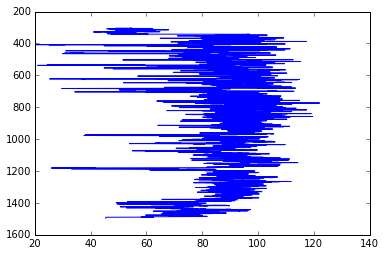

In [11]:
plt.plot(gr[:,1],gr[:,0])
plt.gca().invert_yaxis()
plt.show()

In [12]:
g = gr[:,1]
d = gr[:,0]

In [13]:
gn, dn = b.util.top_and_tail(g, d)

In [14]:
dn[1] - dn[0]

0.15240000000000009

In [15]:
np.amin(gn), np.amax(gn)

(20.357399999999998, 122.07510000000001)

In [16]:
np.amin(dn), np.amax(dn), dn.size

(304.34280000000001, 1495.1964, 7815)

## Target JSON

Multiple ways to do this... could do it log-by-log... or (probably better) do a suite of logs with the same depth range/sampling.

Use fuzzyLAS? 

In [17]:
{
    'metadata': {
        'length': 7815,
        'dtype': float,
        'min': 20.3574,
        'max': 122.0751,
        'global_min': 0,
        'global_max': 150,
    },
    
    'z': {
        'min': 304.3428,   # AKA start
        'max': 1495.3488,  # AKA stop
        'int': 0.1524,
        'units': 'm',
        'domain': 'depth',
    },
}

{'metadata': {'dtype': float,
  'global_max': 150,
  'global_min': 0,
  'length': 7815,
  'max': 122.0751,
  'min': 20.3574},
 'z': {'domain': 'depth',
  'int': 0.1524,
  'max': 1495.3488,
  'min': 304.3428,
  'units': 'm'}}

OK, let's built that, the long way around for now...

In [18]:
data = {'metadata': {}, 'z': {}}

In [19]:
data['metadata']['length'] = 7815
data['metadata']['dtype'] = 'float'
data['metadata']['min'] = 20.3574
data['metadata']['max'] = 122.0751
data['metadata']['global_min'] = 0
data['metadata']['global_max'] = 150

data['z']['min'] = 304.3428
data['z']['max'] = 1495.3488
data['z']['int'] = 0.1524
data['z']['units'] = 'm'
data['z']['domain'] = 'depth'

data

{'metadata': {'dtype': 'float',
  'global_max': 150,
  'global_min': 0,
  'length': 7815,
  'max': 122.0751,
  'min': 20.3574},
 'z': {'domain': 'depth',
  'int': 0.1524,
  'max': 1495.3488,
  'min': 304.3428,
  'units': 'm'}}

In [20]:
data['data'] = gn.tolist()

In [21]:
import json
with open('/Users/matt/Dropbox/Public/well_log.json', 'w') as f:
    f.write(json.dumps(data))